# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** Babey, Arthur Léo Maurin

Buot De L'Epine, Matthieu Marie Emmanuel

Moufidi, Abderrazzaq

**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

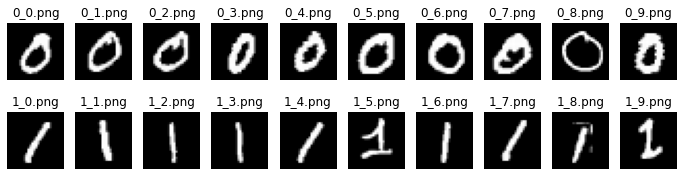

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors


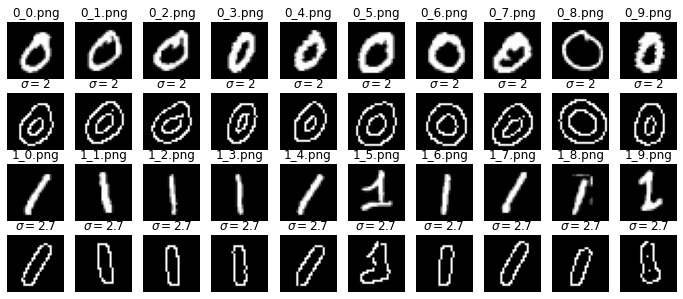

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature

zeros_im_filtres_contours=[]#contours of zeros images
ones_im_filtres_contours=[]#contours of ones images
# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.7)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()

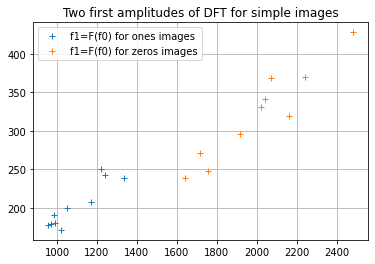

The first two amplitude of DFT of the 0 zero image are [1913.89994514  295.57659737]
The first two amplitude of DFT of the 0 one image are [1913.89994514  295.57659737]
The first two amplitude of DFT of the 1 zero image are [2023.18387696  330.93194789]
The first two amplitude of DFT of the 1 one image are [2023.18387696  330.93194789]
The first two amplitude of DFT of the 2 zero image are [2041.81512385  341.97968588]
The first two amplitude of DFT of the 2 one image are [2041.81512385  341.97968588]
The first two amplitude of DFT of the 3 zero image are [1755.09600877  248.63095911]
The first two amplitude of DFT of the 3 one image are [1755.09600877  248.63095911]
The first two amplitude of DFT of the 4 zero image are [1643.32589586  238.71512431]
The first two amplitude of DFT of the 4 one image are [1643.32589586  238.71512431]
The first two amplitude of DFT of the 5 zero image are [2073.14857162  368.20725761]
The first two amplitude of DFT of the 5 one image are [2073.14857162  

In [4]:
## Fourier transform
from scipy.linalg import dft

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature

################################### Fourier descriptors #####################################################
def fourier_descriptor(zeros_im_filtres_contour,ones_im_filtres_contour):#Parameters will be images that are already filtered
    u_ones=[] ## vector contain all the coordinate of contours in each ones images
    u_ones_dft=[] ## vector dft (just two first) contain all the coordinate of contours in each ones images
    u_zeros=[] ## vector contain all the coordinate of contours in each zeros images
    u_zeros_dft=[] ## vector dft (just two first features) contain all the coordinate of contours in each zeros images
    for contour in zeros_im_filtres_contour:
        # Get the point of contour
        u_ones+=[contour[k,0]+contour[k,1]*1j for k in range(len(contour))]
        x=np.array([contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))])
        # Aply the DFT
        m = dft(len(x))
        list_fourier_zeros=m.dot(x)
        u_zeros_dft+=[list_fourier_zeros[0:2]]
    for contour in ones_im_filtres_contour:
        # Get the point of contour
        u_zeros+=[[contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))]]
        x=np.array([contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))])
        # Aply the DFT
        m = dft(len(x))
        list_fourier_ones=m.dot(x)
        u_ones_dft+=[list_fourier_ones[0:2]]
    # Amplitude of Fourier descriptors of each image
    amplitude_ones=np.abs(np.array(u_ones_dft))
    amplitude_zeros=np.abs(np.array(u_zeros_dft))
    plt.plot(amplitude_ones[:,0],amplitude_ones[:,1],'+', label='f1=F(f0) for ones images')
    plt.plot(amplitude_zeros[:,0],amplitude_zeros[:,1],'+', label='f1=F(f0) for zeros images')
    plt.legend()
    plt.title("Two first amplitudes of DFT for simple images")
    plt.grid()
    plt.show()
    for k in range(10):
        print("The first two amplitude of DFT of the",k,"zero image are",amplitude_zeros[k])
        print("The first two amplitude of DFT of the",k,"one image are",amplitude_zeros[k])
fourier_descriptor(zeros_im_filtres_contours,ones_im_filtres_contours)

   By just using the two first components of discret Fourier transform, we can precisely distinguish between 1 and 0. 
To see the effect of rotation 90° and translation on the Fourier descriptors, we will use the same algorithm but we will modify just the images.

Remark : for the ordering of contour's points we have tried to use clockwise in OpenCV, but we didn't use it.

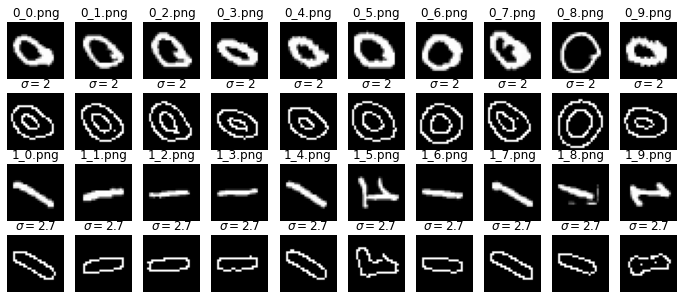

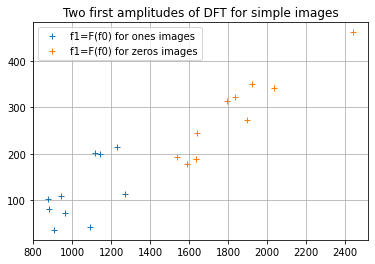

The first two amplitude of DFT of the 0 zero image are [1639.9039606   244.69980749]
The first two amplitude of DFT of the 0 one image are [1639.9039606   244.69980749]
The first two amplitude of DFT of the 1 zero image are [1898.22680415  273.66745019]
The first two amplitude of DFT of the 1 one image are [1898.22680415  273.66745019]
The first two amplitude of DFT of the 2 zero image are [1921.16318932  349.50313113]
The first two amplitude of DFT of the 2 one image are [1921.16318932  349.50313113]
The first two amplitude of DFT of the 3 zero image are [1637.11239687  187.84726915]
The first two amplitude of DFT of the 3 one image are [1637.11239687  187.84726915]
The first two amplitude of DFT of the 4 zero image are [1588.45081762  178.90938237]
The first two amplitude of DFT of the 4 one image are [1588.45081762  178.90938237]
The first two amplitude of DFT of the 5 zero image are [1796.685003    314.08230431]
The first two amplitude of DFT of the 5 one image are [1796.685003    

In [5]:
######################## Rotating images ###########################################

from PIL import Image

# Rotating the images to 90° to see if the Fourier descriptors are the same
zeros_im_rotated=np.zeros((10,28,28))
ones_im_rotated=np.zeros((10,28,28))
cpt=0
for im in zeros_im:
    zeros_im_rotated[cpt]=cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
    cpt+=1
cpt=0
for im in ones_im:
    ones_im_rotated[cpt]=cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
    cpt+=1

zeros_im_filtres_contours_rotated=[]#contours of zeros images
ones_im_filtres_contours_rotated=[]#contours of ones images

# Plot images
fig, axes = plt.subplots(4, len(zeros_im_rotated), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im_rotated, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im_rotated):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours_rotated+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im_rotated, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im_rotated, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.7)
    ones_im_filtres_contours_rotated+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()


fourier_descriptor(zeros_im_filtres_contours_rotated,ones_im_filtres_contours_rotated)



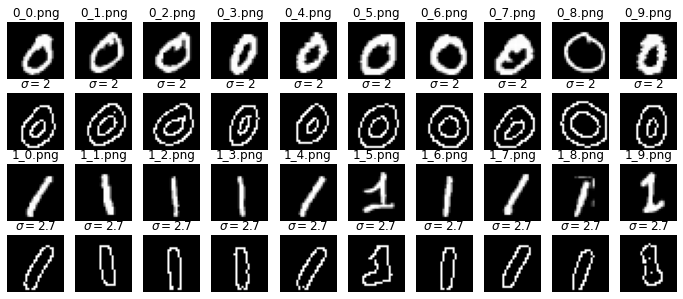

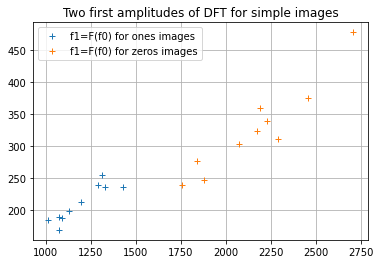

The first two amplitude of DFT of the 0 zero image are [2075.33250348  302.95149175]
The first two amplitude of DFT of the 0 one image are [2075.33250348  302.95149175]
The first two amplitude of DFT of the 1 zero image are [2175.16390187  324.22746709]
The first two amplitude of DFT of the 1 one image are [2175.16390187  324.22746709]
The first two amplitude of DFT of the 2 zero image are [2229.01772088  339.89912947]
The first two amplitude of DFT of the 2 one image are [2229.01772088  339.89912947]
The first two amplitude of DFT of the 3 zero image are [1880.91732939  246.81908577]
The first two amplitude of DFT of the 3 one image are [1880.91732939  246.81908577]
The first two amplitude of DFT of the 4 zero image are [1759.29076619  238.71512431]
The first two amplitude of DFT of the 4 one image are [1759.29076619  238.71512431]
The first two amplitude of DFT of the 5 zero image are [2192.81782189  359.00699377]
The first two amplitude of DFT of the 5 one image are [2192.81782189  

In [6]:
ones_im_translat=np.zeros((10,28,28))
zeros_im_translat=np.zeros((10,28,28))
translation_matrix = np.float32([ [1,0,1], [0,1,1] ])#translation matrix
num_rows, num_cols = 28,28
zeros_im_filtres_contours_translat=[]#contours of zeros images
ones_im_filtres_contours_translat=[]#contours of ones images

cpt=0
for img in ones_im:
    ones_im_translat[cpt] = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
    cpt+=1
cpt=0
for img in zeros_im:
    zeros_im_translat[cpt] = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
    cpt+=1
# Plot images
fig, axes = plt.subplots(4, len(zeros_im_translat), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im_translat, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im_translat):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours_translat+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im_translat, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im_translat, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.7)
    ones_im_filtres_contours_translat+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()

fourier_descriptor(zeros_im_filtres_contours_translat,ones_im_filtres_contours_translat)



We can notice that translation or rotation did not affect the separtion of the two numbers images, thus we can conclude the invariance of Fourier descriptors for the rotation and the displacement of $f_0$ in translation transform.

### 1.3 Additional method(s)

Principal Component Analysis

PCA allows to extract the eigenvectors for a matrix. We use this tool to find the maximum eigenvector associated to each image. Since we only want two features, we compute the eigenvector for the sum of the zeros and the ones images. And then multiply both these vectors with all images, taking the norm of the result gives us two values that we can plot. Ideally we would like to have two clusters corresponding to the zeros and ones, one in the top left and one in the bottom right corner. This is not exactly what we get but we can still distinguish the two correct clusters.

In [7]:
from sklearn.decomposition import PCA
import numpy as np
from scipy import ndimage as ndi
import cv2
from skimage import feature

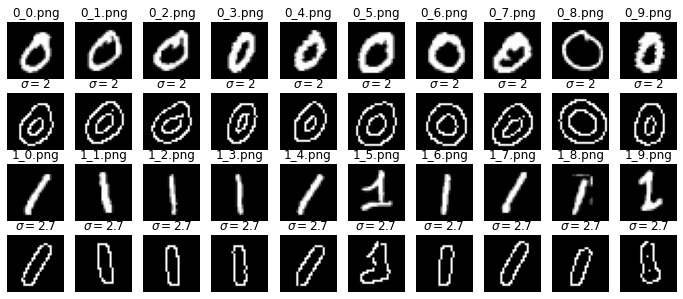

In [8]:
zeros_im_filtres_contours=[]#contours of zeros images
ones_im_filtres_contours=[]#contours of ones images

zeros_im_2 = []
ones_im_2 = []

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_2.append(edges)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.7)
    ones_im_2.append(edges)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()

In [9]:
zeros_im = np.array(zeros_im_2)
ones_im = np.array(ones_im_2)

pca = PCA(n_components=1)
pca.fit(zeros_im.sum(axis=0))
#pca.fit(zeros_im[0])
zeros_sing_vec = pca.components_[0]
pca.fit(ones_im.sum(axis=0))
#pca.fit(ones_im[0])
ones_sing_vec = pca.components_[0]

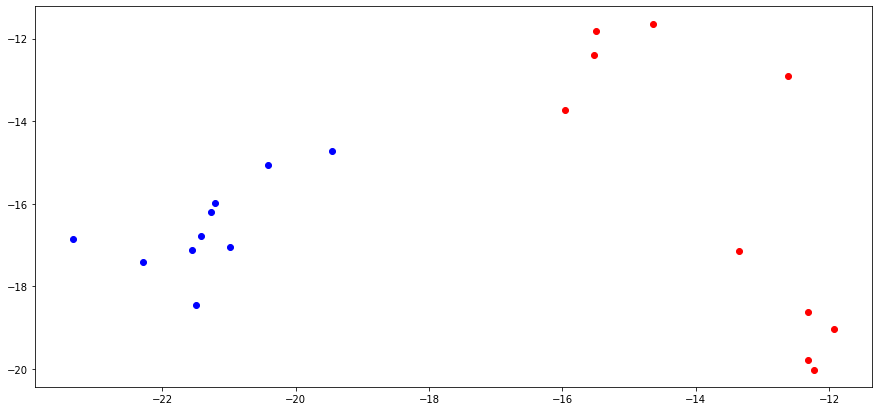

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in range(10):
    ax.scatter(np.matmul(zeros_im[i], zeros_sing_vec).sum(), np.matmul(zeros_im[i], ones_sing_vec).sum(), c='blue')
    ax.scatter(np.matmul(ones_im[i], zeros_sing_vec).sum(), np.matmul(ones_im[i], ones_sing_vec).sum(), c='red')

plt.show()

We tried another simple additional methods. We compute the size of each images and plot them to see if they are separate.

In [11]:
zeros_pixel_size = []

for im in zeros_im:
    im = im.astype(bool).astype(int)
    zeros_pixel_size += [im.sum()]
    
ones_pixel_size = []

for im in ones_im:
    im = im.astype(bool).astype(int)
    ones_pixel_size += [im.sum()]

zeros_pixel_size = np.asarray(zeros_pixel_size)
ones_pixel_size = np.asarray(ones_pixel_size)

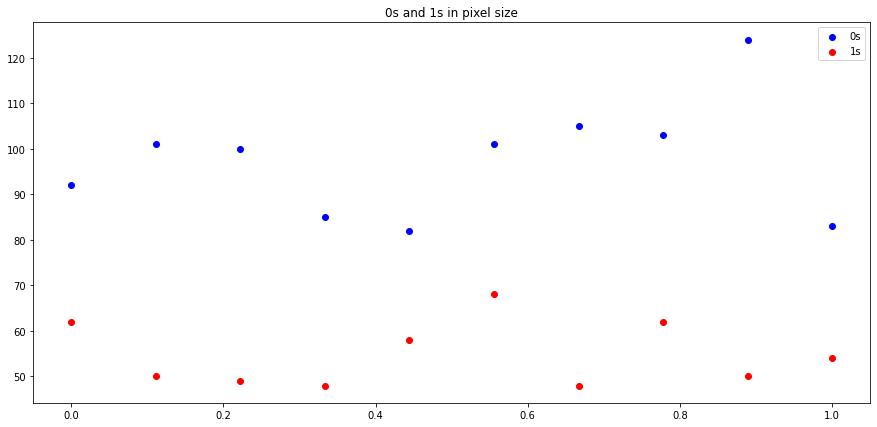

In [12]:
x = np.linspace(0, 1, 10, endpoint=True)
f, ax = plt.subplots( figsize=(15,7))

ax.scatter(x, zeros_pixel_size[:], c='blue', label = '0s')
ax.scatter(x, ones_pixel_size[:], c='red', label = '1s')

plt.legend()
ax.set_title('0s and 1s in pixel size')
plt.show()

As we can see this simple is quite succesful we could easily separate the 0s and 1s cluster on the plot.

### 2.1 Data visualization

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

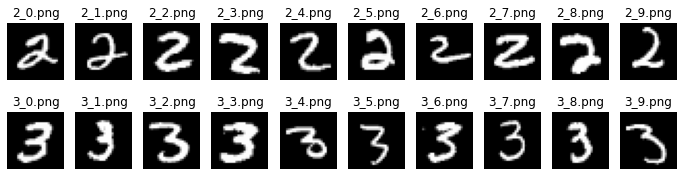

In [13]:
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)
#  Load twos
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load threes
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
Let's have a look on all the digits and their contours.

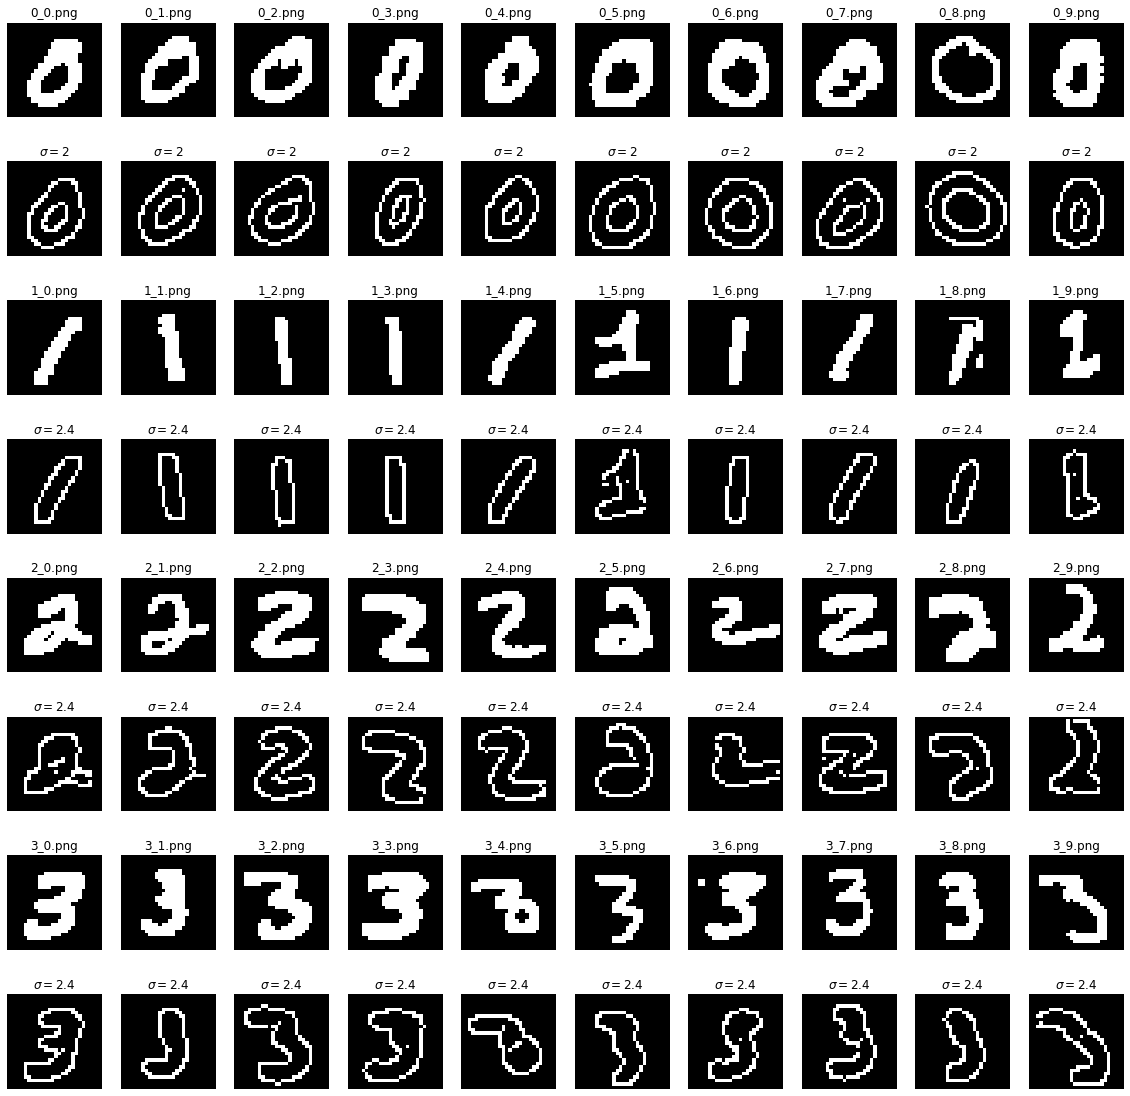

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature

zeros_im_filtres_contours=[] #contours of zeros images
ones_im_filtres_contours=[] #contours of ones images
twos_im_filtres_contours = []
threes_im_filtres_contours = []



# Plot images
fig, axes = plt.subplots(8, len(zeros_im), figsize=(20, 20))

for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    im = im.astype(bool).astype(int) #image binarization
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
    
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    im = im.astype(bool).astype(int)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.4$')

    
for ax, im, nm in zip(axes[4], twos_im, twos_names):
    im = im.astype(bool).astype(int)    
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[5], twos_im, twos_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    twos_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.4$')    
    
    
for ax, im, nm in zip(axes[6], threes_im, threes_names):
    im = im.astype(bool).astype(int)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[7], threes_im, threes_names):
    # Compute the Canny filter for two values of sigma

    edges = feature.canny(im,sigma=2.4)
    threes_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.4$')    
    
    
    
plt.show()

We can see on the plot above that the contours from the 2's and 3's look pretty similar. Could be hard to discrimate these two digits.

Using the same process as in part 1 here we compute the Fourier descriptors from the contours

In [15]:
## Fourier transform
from scipy.linalg import dft

def get_fourier_descriptors(contours, nb_descriptors = 2):
    """"
    Compute the nth first Fourier descriptor and return 
    the signals their DFT and the nth first amplitude of the Fourier descriptors
    
    """
    u_=[] 
    u_dft=[]
    
    for c in contours:
        u_+= [c[k,0]+c[k,1]*1j for k in range(len(c))]
        x=np.array([c[0,k]+c[1,k]*1j for k in range(len(c[0]))])
        m = dft(len(x))
        list_fourier = m.dot(x)
        u_dft +=[list_fourier[0:nb_descriptors]]
        amp = np.abs(np.array(u_dft))
    
    return u_, u_dft, amp

In [16]:
u_0, u_0_dft, amp0 = get_fourier_descriptors(zeros_im_filtres_contours)
u_1, u_1_dft, amp1 = get_fourier_descriptors(ones_im_filtres_contours)
u_2, u_2_dft, amp2 = get_fourier_descriptors(twos_im_filtres_contours)
u_3, u_3_dft, amp3 = get_fourier_descriptors(threes_im_filtres_contours)

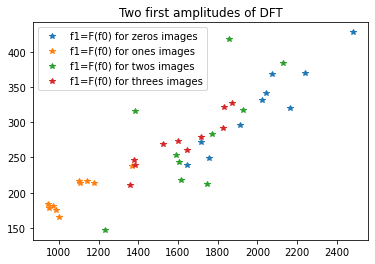

In [17]:
plt.plot(amp0[:,0],amp0[:,1],'*', label='f1=F(f0) for zeros images')
plt.plot(amp1[:,0],amp1[:,1],'*', label='f1=F(f0) for ones images')
plt.plot(amp2[:,0],amp2[:,1],'*', label='f1=F(f0) for twos images')
plt.plot(amp3[:,0],amp3[:,1],'*', label='f1=F(f0) for threes images')

plt.legend()
plt.title("Two first amplitudes of DFT")
plt.show()

As we can see by ploting the first twos amplitudes of the Fourier descriptors we can not discriminate the fourth different digits. It seems that the 0s and the 1s are still well separate but the 2s and 3s are not.

To bypass this problem we try to use more than two amplitude and then used a dimension reduction algotithm to compute a 2d feature vector. Then we can simply plot this 2d feature vector. We first try the TSNE algorithm which is a nonlinear dimensionality reduction technique with 3, 4, 6 and 10 amplitude before the reduction.

In [18]:
from sklearn.manifold import TSNE

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 3)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 3)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 3)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 3)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X3 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 4)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 4)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 4)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 4)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X4 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 6)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours,6)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 6)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 6)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X6 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 10)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 10)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 10)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 10)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X10 = TSNE(n_components=2, perplexity = 10).fit_transform(amps)

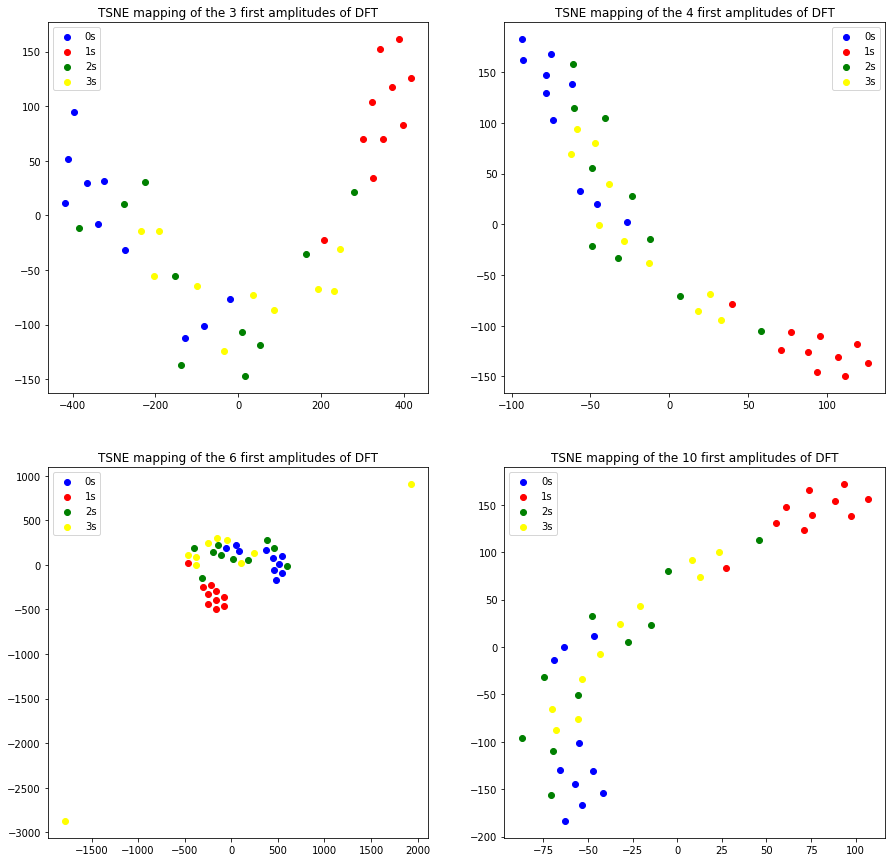

In [19]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X3[:10, 0], X3[:10, 1], c='blue', label = '0s')
ax1.scatter(X3[10:20, 0], X3[10:20, 1], c='red', label = '1s')
ax1.scatter(X3[20:30, 0], X3[20:30, 1], c='green', label = '2s')
ax1.scatter(X3[30:, 0], X3[30:, 1], c='yellow', label = '3s')
ax1.set_title('TSNE mapping of the 3 first amplitudes of DFT')
ax1.legend()

ax2.scatter(X4[:10, 0], X4[:10, 1], c='blue', label = '0s')
ax2.scatter(X4[10:20, 0], X4[10:20, 1], c='red', label = '1s')
ax2.scatter(X4[20:30, 0], X4[20:30, 1], c='green', label = '2s')
ax2.scatter(X4[30:, 0], X4[30:, 1], c='yellow', label = '3s')
ax2.set_title('TSNE mapping of the 4 first amplitudes of DFT')
ax2.legend()

ax3.scatter(X6[:10, 0], X6[:10, 1], c='blue', label = '0s')
ax3.scatter(X6[10:20, 0], X6[10:20, 1], c='red', label = '1s')
ax3.scatter(X6[20:30, 0], X6[20:30, 1], c='green', label = '2s')
ax3.scatter(X6[30:, 0], X6[30:, 1], c='yellow', label = '3s')
ax3.set_title('TSNE mapping of the 6 first amplitudes of DFT')
ax3.legend()

ax4.scatter(X10[:10, 0], X10[:10, 1], c='blue', label = '0s')
ax4.scatter(X10[10:20, 0], X10[10:20, 1], c='red', label = '1s')
ax4.scatter(X10[20:30, 0], X10[20:30, 1], c='green', label = '2s')
ax4.scatter(X10[30:, 0], X10[30:, 1], c='yellow', label = '3s')
ax4.set_title('TSNE mapping of the 10 first amplitudes of DFT')
ax4.legend()


plt.show()

Let's now try with UMAP which is another algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis.

In [20]:
import umap

reducer = umap.UMAP()

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 3)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 3)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 3)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 3)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X3 = reducer.fit_transform(amps)

_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 4)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 4)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 4)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 4)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X4 = reducer.fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 6)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours,6)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 6)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 6)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X6 = reducer.fit_transform(amps)


_, _, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 10)
_, _, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 10)
_, _, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 10)
_, _, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 10)

amps = np.concatenate([amp0, amp1, amp2, amp3], 0)
X10 = reducer.fit_transform(amps)

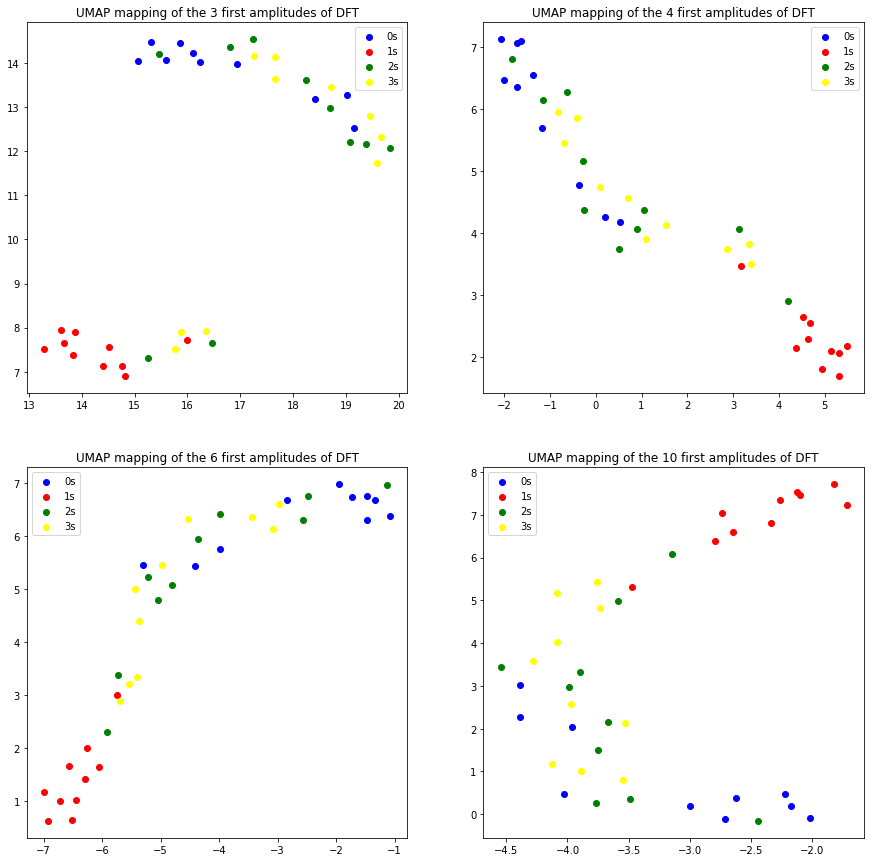

In [21]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X3[:10, 0], X3[:10, 1], c='blue', label = '0s')
ax1.scatter(X3[10:20, 0], X3[10:20, 1], c='red', label = '1s')
ax1.scatter(X3[20:30, 0], X3[20:30, 1], c='green', label = '2s')
ax1.scatter(X3[30:, 0], X3[30:, 1], c='yellow', label = '3s')
ax1.set_title('UMAP mapping of the 3 first amplitudes of DFT')
ax1.legend()

ax2.scatter(X4[:10, 0], X4[:10, 1], c='blue', label = '0s')
ax2.scatter(X4[10:20, 0], X4[10:20, 1], c='red', label = '1s')
ax2.scatter(X4[20:30, 0], X4[20:30, 1], c='green', label = '2s')
ax2.scatter(X4[30:, 0], X4[30:, 1], c='yellow', label = '3s')
ax2.set_title('UMAP mapping of the 4 first amplitudes of DFT')
ax2.legend()

ax3.scatter(X6[:10, 0], X6[:10, 1], c='blue', label = '0s')
ax3.scatter(X6[10:20, 0], X6[10:20, 1], c='red', label = '1s')
ax3.scatter(X6[20:30, 0], X6[20:30, 1], c='green', label = '2s')
ax3.scatter(X6[30:, 0], X6[30:, 1], c='yellow', label = '3s')
ax3.set_title('UMAP mapping of the 6 first amplitudes of DFT')
ax3.legend()

ax4.scatter(X10[:10, 0], X10[:10, 1], c='blue', label = '0s')
ax4.scatter(X10[10:20, 0], X10[10:20, 1], c='red', label = '1s')
ax4.scatter(X10[20:30, 0], X10[20:30, 1], c='green', label = '2s')
ax4.scatter(X10[30:, 0], X10[30:, 1], c='yellow', label = '3s')
ax4.set_title('UMAP mapping of the 10 first amplitudes of DFT')
ax4.legend()

plt.show()

As expected we can see similar results than with t-sne method. 1s in red are the only digit that cluter quite well. Increasing the number of dft's amplitude before the dimension reduction does not help.

We also try to use those dimension reduction algorithms directly on the image. First we have to flatten the image then reduce their dimensionality from 28*28 to 2.

In [22]:
zeros_im = zeros_im.reshape(10, 28*28)
ones_im = ones_im.reshape(10, 28*28)
twos_im = twos_im.reshape(10, 28*28)
threes_im = threes_im.reshape(10, 28*28)

Xu = reducer.fit_transform(np.concatenate([zeros_im, ones_im, twos_im, threes_im], 0))
Xt = TSNE(n_components=2, perplexity = 10).fit_transform(np.concatenate([zeros_im, ones_im, twos_im, threes_im], 0))

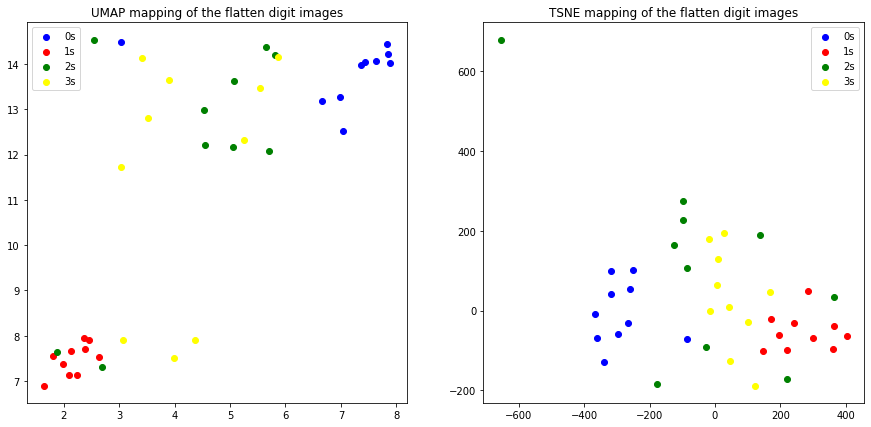

In [23]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.scatter(Xu[:10, 0], X3[:10, 1], c='blue', label = '0s')
ax1.scatter(Xu[10:20, 0], X3[10:20, 1], c='red', label = '1s')
ax1.scatter(Xu[20:30, 0], X3[20:30, 1], c='green', label = '2s')
ax1.scatter(Xu[30:, 0], X3[30:, 1], c='yellow', label = '3s')
ax1.set_title('UMAP mapping of the flatten digit images')
ax1.legend()

ax2.scatter(Xt[:10, 0], Xt[:10, 1], c='blue', label = '0s')
ax2.scatter(Xt[10:20, 0], Xt[10:20, 1], c='red', label = '1s')
ax2.scatter(Xt[20:30, 0], Xt[20:30, 1], c='green', label = '2s')
ax2.scatter(Xt[30:, 0], Xt[30:, 1], c='yellow', label = '3s')
ax2.set_title('TSNE mapping of the flatten digit images')
ax2.legend()

plt.show()

We finally try our simple method by plotting the pixel size of the digit.

In [24]:
twos_pixel_size = []

for im in twos_im:
    im = im.astype(bool).astype(int)
    twos_pixel_size += [im.sum()]
    
threes_pixel_size = []

for im in threes_im:
    im = im.astype(bool).astype(int)
    threes_pixel_size += [im.sum()]

twos_pixel_size = np.asarray(twos_pixel_size)
threes_pixel_size = np.asarray(threes_pixel_size)

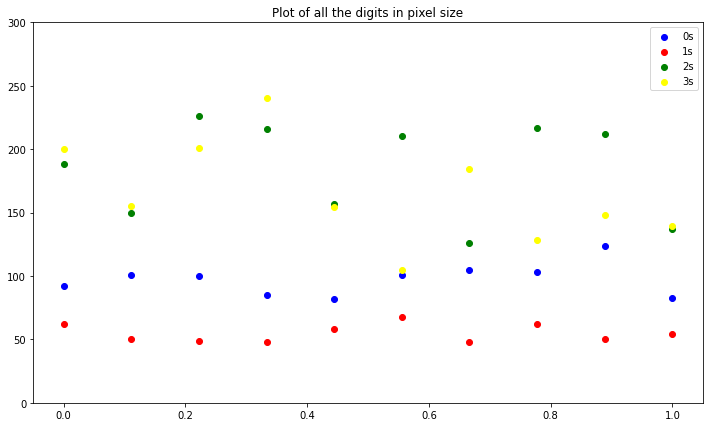

In [25]:
x = np.linspace(0, 1, 10, endpoint=True)
f, ax = plt.subplots( figsize=(12,7))

ax.scatter(x, zeros_pixel_size[:], c='blue', label = '0s')
ax.scatter(x, ones_pixel_size[:], c='red', label = '1s')
ax.scatter(x, twos_pixel_size[:], c='green', label = '2s')
ax.scatter(x, threes_pixel_size[:], c='yellow', label = '3s')

ax = plt.gca()
ax.set_ylim([0,300])

plt.legend()
ax.set_title('Plot of all the digits in pixel size')
plt.show()

As we can see here the pixel size method does not allow to discriminate all the digits.

As a conclusion we can say that with the dataset we had we did not were able to properly discrimante the four different digit. We guess that it should be doable but it seems that the Fourier Descriptors can't capture four different digit which are pretty similar.